### Importing Necessary Libraries

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Host, Username, password and database
host = "localhost"
user = "root"
password = "Anirudh@1234"
database = "financial_portfolio_management_system"

### Connecting to the Database

In [3]:
# Function to connect database with python, and retreive data from database
def get_values(query):
    try:
        conn = mysql.connector.connect(
            host=host,
            user=user,
            password=password,
            database=database
        )
    except:
        print("Error while opening Database connection")
        return None
    df = pd.read_sql(query,conn)
    conn.close()
    return df

### Simple SQL Queries 

In [4]:
# Display Fundamentally Strong Companies
query_fd = """select f.ISIN,c.Name from Fundamental_Report f, Company c 
              where f.ISIN = c.ISIN and 
              EPS >= 6 and 
              Debt < 8000000000 and 
              P_E_Ratio > 18 and P_E_Ratio < 28"""
df_fd = get_values(query_fd)
df_fd

,ISIN,Name
0,7,JPMorgan Chase & Co.
1,12,Meta Platforms Inc.
2,14,PepsiCo Inc.
3,19,McDonald's Corporation


In [5]:
# Display Technically strong Companies

query_vol = "select avg(Volume) from Technical_Strategy"
query_tech_str = """select t.ISIN,c.Name from Technical_Strategy t, Company c
                    where t.ISIN = c.ISIN and
                    t.Volatility < 0.17 and
                    t.Volume > 450000 and
                    t.MACD = 'bull' and
                    t.RSI > 50 and
                    t.Sharpe_ratio > 0.8"""
df_vol = get_values(query_vol)
df_tech_str = get_values(query_tech_str)

print("The Average volume of companies is: ",df_vol.values)
print('\nTechnically strong companies to invest in are:')
df_tech_str

The Average volume of companies is:  [[459000.]]

Technically strong companies to invest in are:


,ISIN,Name
0,1,Apple Inc
1,2,Alphabet
2,3,Microsoft
3,11,Netflix Inc.


### Visualizing the database using SQL Queries

### 1. Calculate and Display total buy amount of each Ticker in portfolio table


In [6]:
query_amt = """select pc.Ticker, (pc.Quantity*p.price) as total_buy_amount 
                from Portfolio_Creation pc, Price p
                where pc.Ticker=p.Ticker"""
df_amt = get_values(query_amt)
df_amt.sample(5)

,Ticker,total_buy_amount
9,JPM,3750.0
10,KO,2000.0
12,MS,1350.0
7,GS,5000.0
5,GE,150.0


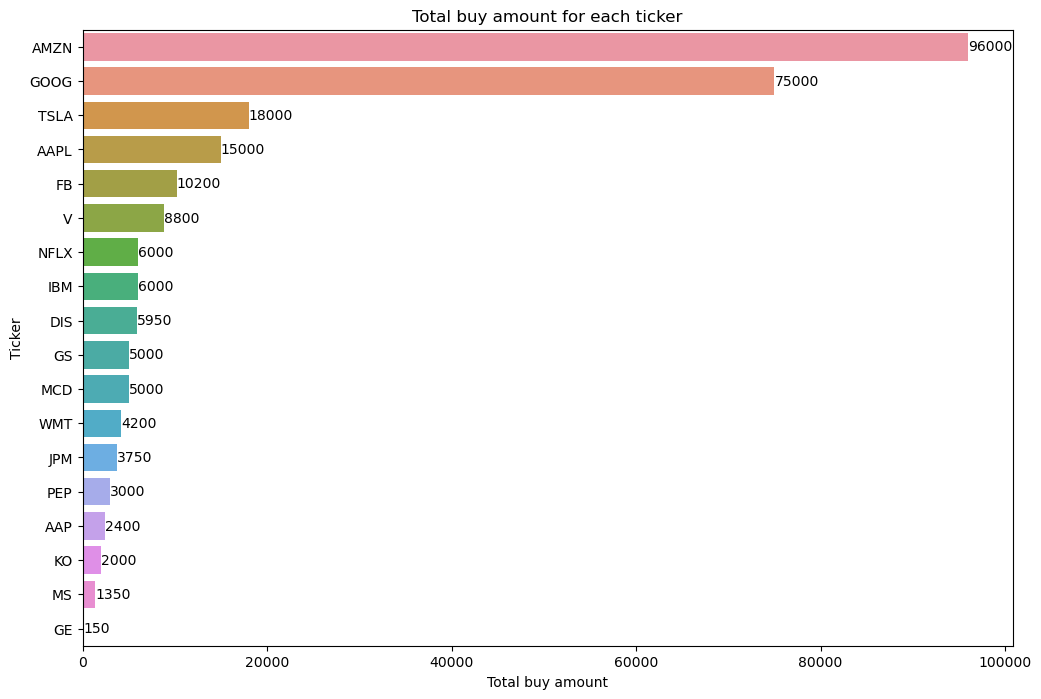

In [7]:
order = df_amt.sort_values('total_buy_amount',ascending=False).Ticker
plt.figure(figsize=(12,8))
amt_plt = sns.barplot(data=df_amt, x='total_buy_amount',y='Ticker',orient='h',order=order)
for bar in amt_plt.patches:
    plt.text(
     bar.get_width(),
     bar.get_y() + bar.get_height() / 2,
     f'{int(bar.get_width())}',
     va='center')
    
plt.title('Total buy amount for each ticker')
plt.xlabel('Total buy amount')
plt.ylabel('Ticker')
plt.show();

### 2. Calculate and Display percentage of investment in each Sector

In [8]:
query_sec = """select pc.Sector, sum(pc.Quantity*p.price) as Amount 
                from Portfolio_Creation pc, Price p
                where pc.Ticker=p.Ticker
                group by pc.Sector"""
df_sec = get_values(query_sec)
df_sec.sample(5)

,Sector,Amount
7,Food,5000.0
6,Beverages,5000.0
0,Automotive,20400.0
3,Entertainment,11950.0
1,Technology,106200.0


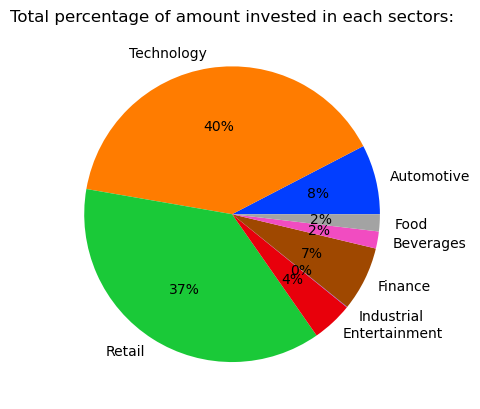

In [9]:
# Pie Chart for Total percentage of amount invested in each sectors
palette_color = sns.color_palette('bright') 
plt.pie(df_sec['Amount'], labels=df_sec['Sector'], colors=palette_color, autopct='%.0f%%') 
plt.title('Total percentage of amount invested in each sectors:')
plt.show() 

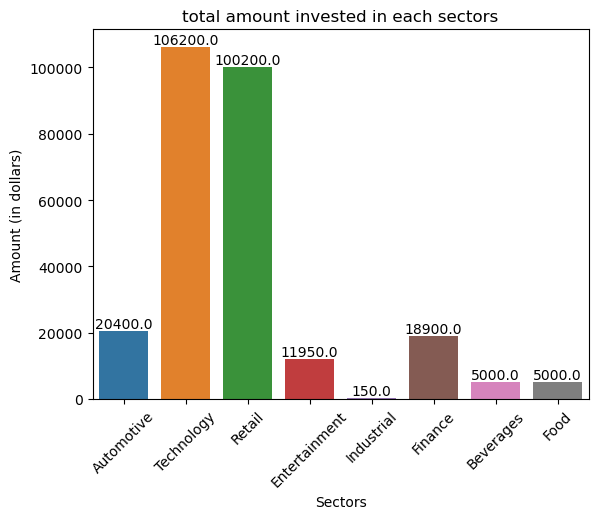

In [10]:
# Bar Chart for total amount invested in each sectors
sns.barplot(data=df_sec,x='Sector',y='Amount')
for index, value in enumerate(df_sec['Amount']):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
plt.title('total amount invested in each sectors')
plt.xlabel('Sectors')
plt.ylabel('Amount (in dollars)')
plt.xticks(rotation=45)
plt.show();

### 3. Visualize the Portfolio return vs Benchmark return over time

In [11]:
query_cmp = """select Benchmark_Return, Portfolio_Return, DATE 
                from Return_Analytics"""
df_tkr = get_values(query_cmp)
df_tkr

,Benchmark_Return,Portfolio_Return,DATE
0,5.0,7.2,2023-01-01
1,4.8,6.5,2023-01-02
2,6.2,8.0,2023-01-03
3,5.5,7.8,2023-01-04
4,7.0,9.5,2023-01-05
5,6.5,8.2,2023-01-06
6,4.0,6.0,2023-01-07
7,5.8,7.5,2023-01-08
8,6.5,8.2,2023-01-09
9,3.5,5.0,2023-01-10


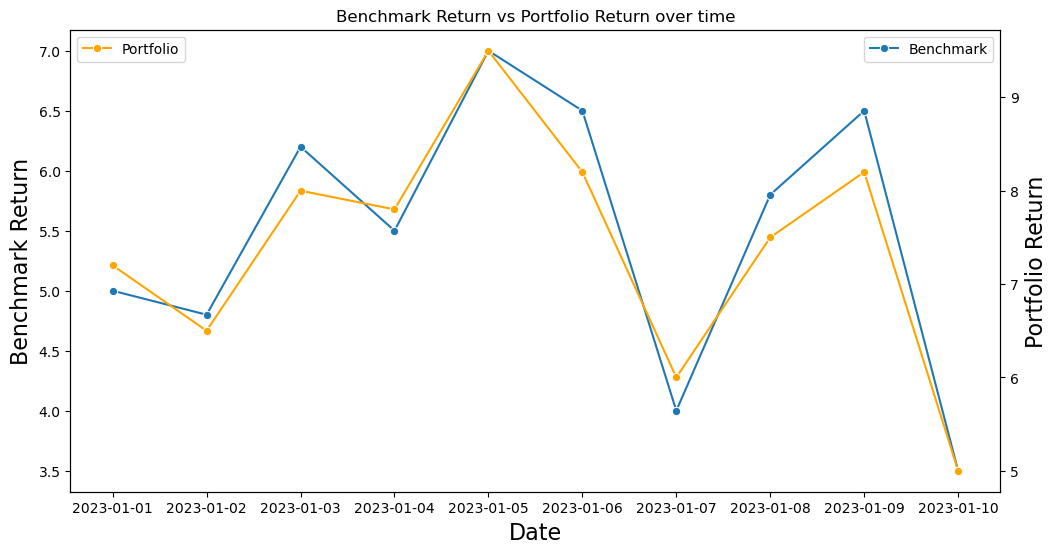

In [12]:
# Visualizing Portfolio return vs Benchmark return over time
plt.figure(figsize=(12, 6))  
ax1 = sns.lineplot(x='DATE', y='Benchmark_Return', data=df_tkr, marker='o', label='Benchmark')
ax2 = ax1.twinx()
sns.lineplot(x='DATE', y='Portfolio_Return', data=df_tkr, ax=ax2, marker='o', color='orange', label='Portfolio')
ax1.set_xlabel('Date', fontsize = 16)
ax1.set_ylabel('Benchmark Return', fontsize = 16)
ax2.set_ylabel('Portfolio Return', fontsize = 16)
plt.title('Benchmark Return vs Portfolio Return over time')
plt.legend(loc = 'upper left') 
plt.show();